## Rain in Australia Classification



    1 - Cleaning 
    2 - Baselining
    3 - Data Splitting 
    4 - Encoding 
    5 - Feature Scaling
    6 - Logistic Regression 
    7 - KNN
    8 - Naive Bayes
    9 - Decission Tree
    10 - Random Forest
    11 - SVM
    12 - Grid search
    13 - Stacking
    14 - XGboost

## Import the Main Modules to be Used

In [2]:
! pip install xgboost

In [192]:
#imports Data exploration and visualization

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#imports Modeles 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,VotingClassifier , ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
import xgboost as xgb

%matplotlib inline

### Load Dataset

In [205]:
df = pd.read_csv('weatherAUS.csv')

In [206]:
df.shape

(145460, 23)

In [207]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [208]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
198,2009-06-17,Albury,0.6,15.9,0.0,NaN,NaN,WSW,13.0,NaN,...,94.0,52.0,1029.7,1027.7,NaN,NaN,5.6,14.9,No,No
49848,2011-03-06,Tuggeranong,11.3,20.8,0.0,NaN,NaN,E,30.0,ENE,...,72.0,49.0,1026.9,1024.9,NaN,NaN,13.1,19.2,No,No
34999,2013-04-18,SydneyAirport,15.6,23.2,11.2,2.6,9.1,S,61.0,NW,...,68.0,74.0,1014.6,1012.6,1.0,6.0,20.3,19.5,Yes,No
98651,2015-02-15,Adelaide,28.8,38.6,0.0,NaN,NaN,WSW,48.0,N,...,20.0,24.0,1011.8,1012.0,NaN,NaN,34.8,36.3,No,No
51916,2017-01-31,Tuggeranong,21.5,34.2,0.0,NaN,NaN,NW,39.0,ENE,...,37.0,33.0,1008.9,1007.8,NaN,NaN,27.6,33.4,No,No


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning

- Check duplicates.
- Check null.

In [210]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [211]:
#df.dropna(how='all')
df.dropna(inplace=True)

In [212]:
df.sample(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45744,2008-04-06,Canberra,5.9,21.8,0.0,2.8,9.3,E,35.0,SSW,...,70.0,35.0,1028.0,1024.1,1.0,5.0,12.9,20.8,No,No
132442,2015-11-15,Hobart,6.2,18.5,1.2,3.4,13.0,SSE,35.0,NNW,...,57.0,40.0,1022.2,1019.4,1.0,1.0,13.1,17.9,Yes,No
94522,2012-05-26,Townsville,16.1,20.3,5.0,1.0,0.0,SW,39.0,SW,...,75.0,77.0,1019.7,1016.3,8.0,8.0,17.7,17.7,Yes,No
85308,2012-02-22,Brisbane,22.9,29.5,0.2,5.4,9.5,ESE,33.0,SSE,...,64.0,62.0,1013.7,1011.9,2.0,7.0,26.5,27.5,No,Yes
85439,2012-07-02,Brisbane,6.5,19.6,0.0,3.4,10.1,W,26.0,WSW,...,48.0,34.0,1019.8,1016.3,0.0,0.0,13.9,19.1,No,No
141100,2014-03-10,Darwin,22.8,32.4,3.4,4.4,6.3,SSW,50.0,SW,...,82.0,58.0,1010.9,1007.4,7.0,7.0,28.5,31.6,Yes,Yes
123433,2016-05-24,Perth,13.2,19.5,23.8,2.8,6.1,NW,61.0,WSW,...,71.0,69.0,1007.0,1008.1,7.0,7.0,17.6,16.6,Yes,Yes
34482,2011-09-20,SydneyAirport,17.3,29.3,0.0,8.0,10.0,W,83.0,N,...,27.0,19.0,1004.5,1006.6,4.0,3.0,25.9,23.2,No,No
40104,2010-07-21,Williamtown,7.6,15.9,24.6,3.6,6.8,SSW,44.0,WSW,...,83.0,59.0,1025.5,1023.8,2.0,5.0,11.3,14.6,Yes,Yes
85254,2011-12-30,Brisbane,20.2,28.4,0.0,7.4,5.3,SE,43.0,S,...,56.0,61.0,1014.5,1013.1,6.0,6.0,24.6,25.5,No,No


In [213]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [214]:
df.shape

(56420, 23)

In [215]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [216]:
df['WindGustDir'].value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [217]:
df['Location'].value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

In [218]:
df.duplicated().sum()

0

In [219]:
df.drop('Date', axis=1, inplace=True)

In [220]:
df.shape

(56420, 22)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

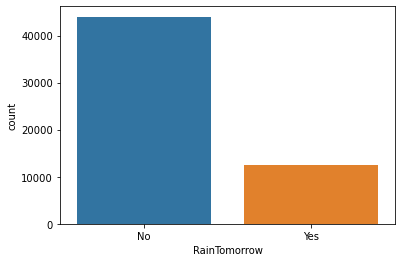

In [221]:
sns.countplot(df["RainTomorrow"])

In [222]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


<function matplotlib.pyplot.show(close=None, block=None)>

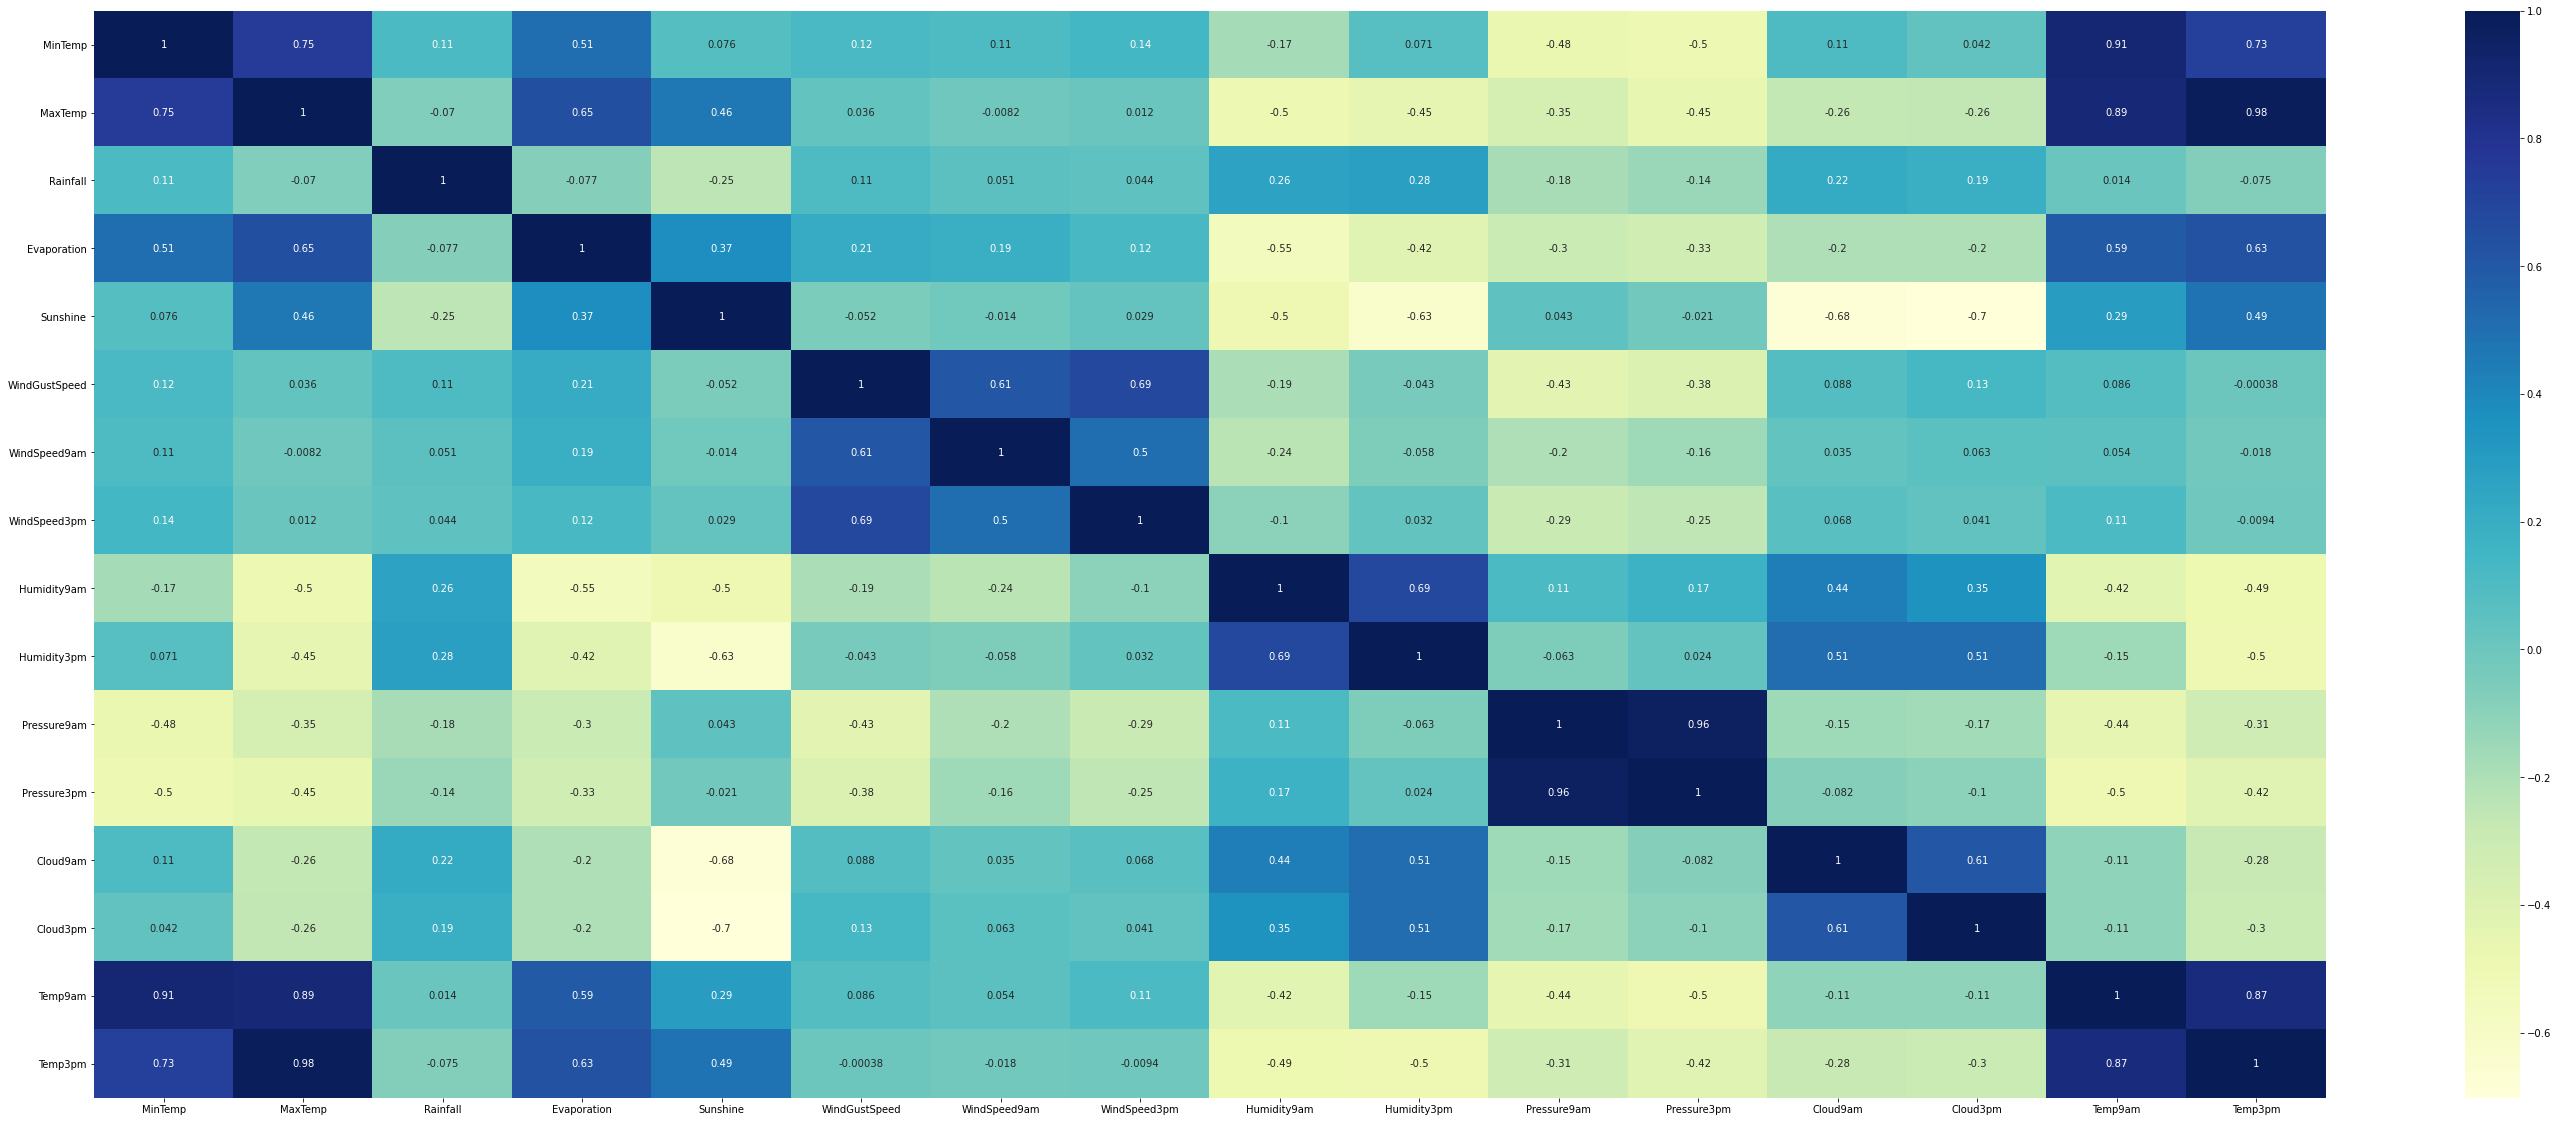

In [223]:
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

In [224]:
top_Location = df.groupby(['Location']).max().sort_values('MaxTemp',ascending=False).head(20)
top_Location.reset_index(inplace=True)
top_Location


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Woomera,31.4,48.1,53.8,81.2,14.2,WSW,115.0,WSW,WSW,...,100.0,99.0,1038.6,1035.9,8.0,9.0,37.9,46.1,Yes,Yes
1,Moree,28.3,47.3,113.0,65.4,14.0,WSW,117.0,WSW,WSW,...,100.0,99.0,1034.1,1030.3,8.0,8.0,34.1,45.8,Yes,Yes
2,MelbourneAirport,30.5,46.8,75.8,23.8,13.9,WSW,122.0,WSW,WSW,...,100.0,98.0,1039.3,1036.0,8.0,8.0,35.4,46.1,Yes,Yes
3,Watsonia,28.1,46.7,84.0,23.8,13.9,WSW,96.0,WSW,WSW,...,100.0,100.0,1039.2,1035.8,8.0,8.0,36.4,45.2,Yes,Yes
4,Mildura,29.8,46.7,82.2,22.8,14.5,WSW,102.0,WSW,WSW,...,100.0,99.0,1038.6,1035.3,8.0,8.0,36.9,46.1,Yes,Yes
5,SydneyAirport,27.5,46.4,67.8,18.4,13.6,WSW,107.0,WSW,WSW,...,100.0,99.0,1038.8,1037.0,8.0,8.0,37.2,44.9,Yes,Yes
6,Melbourne,28.0,46.4,82.2,20.4,13.9,WSW,104.0,WSW,WSW,...,100.0,98.0,1039.0,1035.8,8.0,8.0,35.5,45.4,Yes,Yes
7,Sydney,27.1,45.8,94.4,18.4,13.6,WSW,96.0,WSW,WSW,...,100.0,95.0,1039.0,1036.0,8.0,8.0,36.5,44.7,Yes,Yes
8,Cobar,29.1,45.4,44.0,20.2,13.7,WSW,94.0,WSW,WSW,...,99.0,98.0,1033.0,1031.3,8.0,8.0,37.3,43.4,Yes,Yes
9,WaggaWagga,28.5,45.2,67.6,22.2,14.1,WSW,115.0,WSW,WSW,...,100.0,98.0,1039.6,1036.2,8.0,8.0,35.2,43.0,Yes,Yes


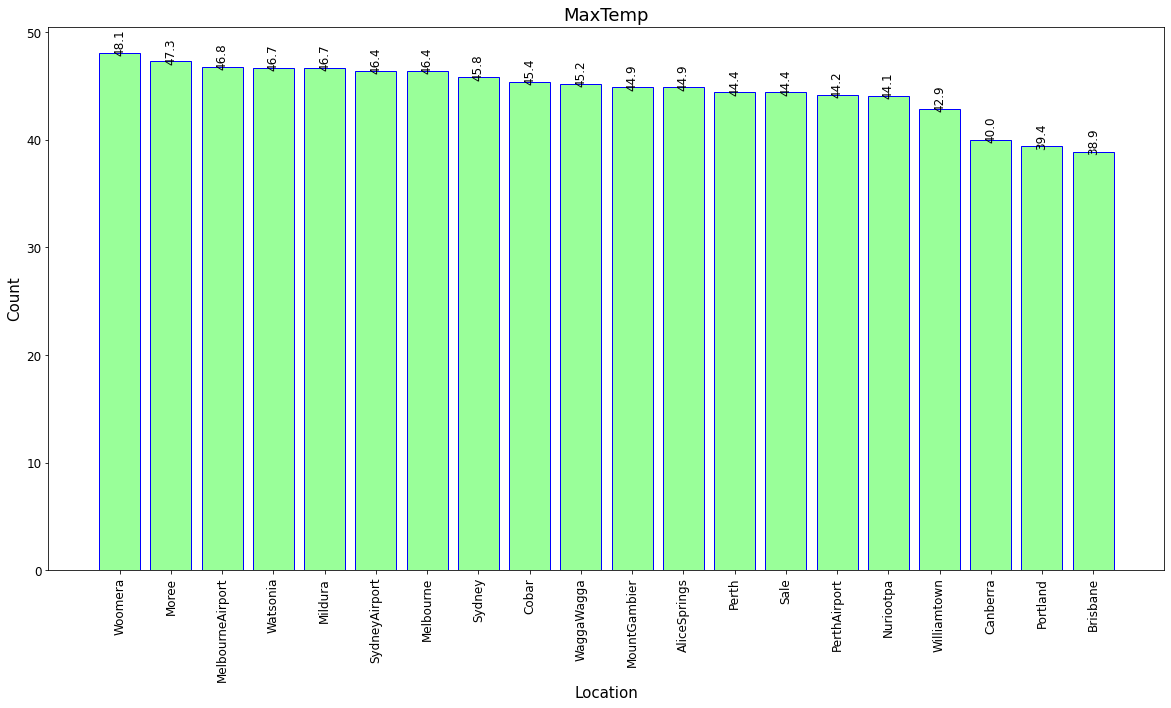

In [225]:

plt.figure(figsize = (20,10)) 
plt.title("MaxTemp", fontsize=18) 
plt.bar(top_Location["Location"], top_Location["MaxTemp"],color= '#99ff99',edgecolor='blue', linewidth = 1)
plt.xlabel("Location",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_Location["MaxTemp"].items(): 
    if v > 800 : 
       plt.text(k,v-300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

- the country with the highest degree : Woomera 48.1

In [226]:
top_Location = df.groupby(['Location']).min().sort_values('MinTemp',ascending=False).head(20)
top_Location.reset_index(inplace=True)
top_Location

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Darwin,12.5,21.9,0.0,0.2,0.0,E,15.0,E,E,...,11.0,5.0,998.8,996.0,0.0,0.0,16.7,19.0,No,No
1,NorfolkIsland,9.4,15.2,0.0,0.0,0.0,E,19.0,E,E,...,40.0,42.0,980.5,979.0,0.0,0.0,12.2,12.3,No,No
2,Cairns,9.3,20.3,0.0,0.2,0.0,E,17.0,E,E,...,24.0,18.0,994.4,992.8,0.0,0.0,17.6,19.2,No,No
3,Townsville,6.4,18.5,0.0,0.4,0.0,E,19.0,E,E,...,6.0,8.0,996.4,993.7,0.0,0.0,14.5,16.2,No,No
4,Sydney,5.0,11.7,0.0,0.0,0.0,E,17.0,E,E,...,19.0,10.0,996.5,994.0,0.0,0.0,6.7,11.0,No,No
5,SydneyAirport,3.2,11.6,0.0,0.0,0.0,E,19.0,E,E,...,12.0,3.0,996.3,989.3,0.0,0.0,6.4,10.3,No,No
6,Brisbane,2.6,12.6,0.0,0.0,0.0,E,11.0,E,E,...,20.0,8.0,997.8,993.2,0.0,0.0,9.9,12.0,No,No
7,Melbourne,2.3,9.9,0.0,0.0,0.0,E,13.0,E,E,...,14.0,6.0,988.9,988.3,0.0,0.0,3.9,8.4,No,No
8,Woomera,0.7,11.3,0.0,0.2,0.0,E,17.0,E,E,...,0.0,0.0,999.5,997.3,0.0,0.0,6.4,10.1,No,No
9,CoffsHarbour,0.6,12.9,0.0,0.0,0.0,E,15.0,E,E,...,21.0,11.0,998.3,995.8,0.0,0.0,9.1,11.7,No,No


In [227]:
top_Location = df.groupby(['Location']).max().sort_values('Rainfall',ascending=False).head(10)
top_Location.reset_index(inplace=True)
top_Location

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Cairns,28.4,38.6,206.2,22.0,12.8,WSW,81.0,WSW,WSW,...,100.0,100.0,1022.3,1019.6,8.0,8.0,33.5,38.0,Yes,Yes
1,Brisbane,28.0,38.9,182.6,44.0,13.5,WSW,93.0,WSW,WSW,...,98.0,98.0,1033.9,1031.5,8.0,8.0,34.4,36.3,Yes,Yes
2,Darwin,29.7,38.0,132.6,16.8,12.3,WSW,102.0,WSW,WSW,...,99.0,99.0,1019.3,1015.4,8.0,8.0,32.2,37.4,Yes,Yes
3,CoffsHarbour,25.2,37.7,128.0,10.0,13.8,WSW,98.0,WSW,WSW,...,97.0,99.0,1034.3,1032.0,8.0,8.0,30.6,37.4,Yes,Yes
4,Perth,29.7,44.4,114.4,17.0,13.9,WSW,83.0,WSW,WSW,...,99.0,97.0,1038.8,1034.3,8.0,8.0,39.0,42.5,Yes,Yes
5,Moree,28.3,47.3,113.0,65.4,14.0,WSW,117.0,WSW,WSW,...,100.0,99.0,1034.1,1030.3,8.0,8.0,34.1,45.8,Yes,Yes
6,Townsville,28.6,38.3,95.2,14.8,12.8,WSW,81.0,WSW,WSW,...,99.0,98.0,1026.1,1023.3,8.0,8.0,33.2,37.4,Yes,Yes
7,Sydney,27.1,45.8,94.4,18.4,13.6,WSW,96.0,WSW,WSW,...,100.0,95.0,1039.0,1036.0,8.0,8.0,36.5,44.7,Yes,Yes
8,Watsonia,28.1,46.7,84.0,23.8,13.9,WSW,96.0,WSW,WSW,...,100.0,100.0,1039.2,1035.8,8.0,8.0,36.4,45.2,Yes,Yes
9,Melbourne,28.0,46.4,82.2,20.4,13.9,WSW,104.0,WSW,WSW,...,100.0,98.0,1039.0,1035.8,8.0,8.0,35.5,45.4,Yes,Yes


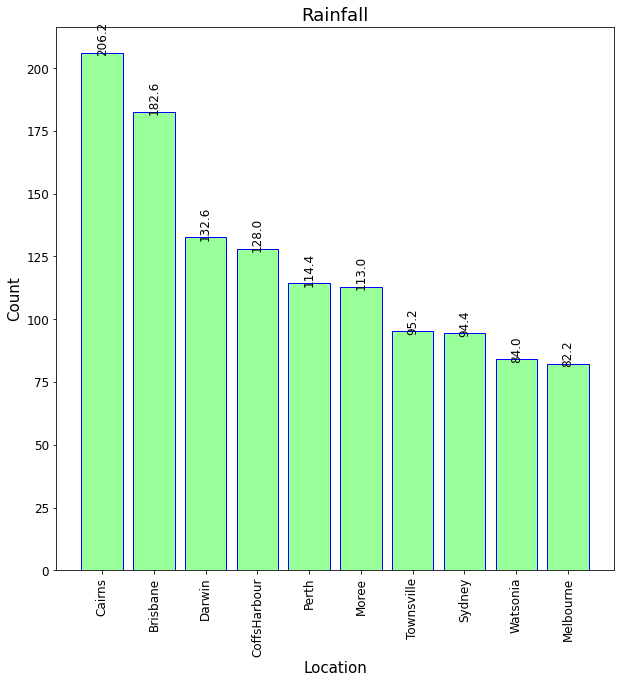

In [228]:
plt.figure(figsize = (10,10)) 
plt.title("Rainfall", fontsize=18) 
plt.bar(top_Location["Location"], top_Location["Rainfall"],color= '#99ff99',edgecolor='blue', linewidth = 1)
plt.xlabel("Location",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_Location["Rainfall"].items(): 
    if v > 800 : 
       plt.text(k,v-300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

- the country with most rain is : cairns
--------

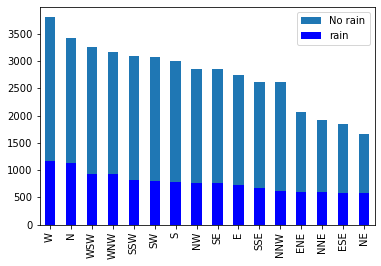

In [229]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
df.loc[df.RainTomorrow == 'No', 'WindGustDir'].value_counts().plot.bar(ax=ax0, label='No rain')
df.loc[df.RainTomorrow == 'Yes', 'WindGustDir'].value_counts().plot.bar(ax=ax0, color='blue', label='rain');
plt.legend()
plt.show()

- the wind direction with most rain : NE
-------

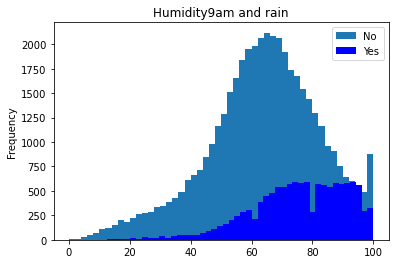

In [230]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
df.loc[df.RainTomorrow == 'No', 'Humidity9am'].plot.hist(ax=ax0, bins=50, label='No')
df.loc[df.RainTomorrow == 'Yes', 'Humidity9am'].plot.hist(ax=ax0, bins=50, color='blue', label='Yes')
plt.legend()
plt.title('Humidity9am and rain');


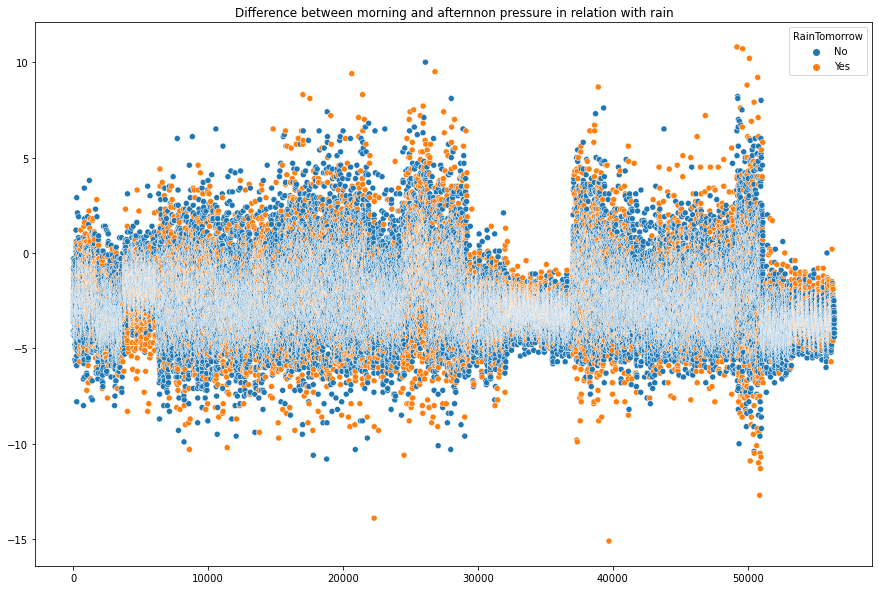

In [231]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x=range(df.shape[0]), y=(df['Pressure3pm']-df['Pressure9am']), hue=df['RainTomorrow'])
plt.title('Difference between morning and afternnon pressure in relation with rain');

- presure  not affecting the rain 
------

----
### Get Dummies

In [232]:
df['RainToday'].replace(to_replace=['Yes', 'No'],value=[1,2], inplace=True)
df['RainTomorrow'].replace(to_replace=['Yes', 'No'],value=[1,2], inplace=True)

In [233]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [234]:
df_dummies

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,1,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,1,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,1,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,1
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0,0,0,0,0,0,0,0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0,0,0,1,0,0,0,0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0,0,0,0,0,0,0,1,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,1,0,0,0,0,0,0,0,0,0


# Basline 

In [235]:
x = df.drop(df[['RainTomorrow','Location','WindGustDir','WindDir9am','WindDir3pm']],axis=1)
y = df[['RainTomorrow']]

In [236]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.05, random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train ,test_size=0.05, random_state=42)

In [237]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8508808106993461

In [239]:
print('The accuracy for training : ',lr.score(x_train,y_train))
print('The accuracy for validation: ',lr.score(x_val,y_val))


The accuracy for training :  0.8508808106993461
The accuracy for validation:  0.8533582089552239


----
### Deal With Outliyers 

In [240]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,1.779121,1.779741
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2.000000,2.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2.000000,2.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2.000000,2.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2.000000,2.000000


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

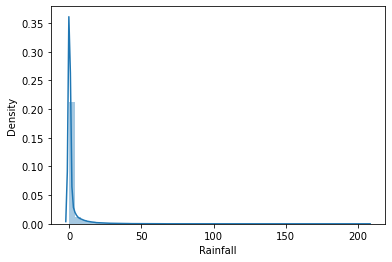

In [241]:
sns.distplot(df['Rainfall'])

In [242]:
q = df['Rainfall'].quantile(0.99)
df = df[df['Rainfall']<q]

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

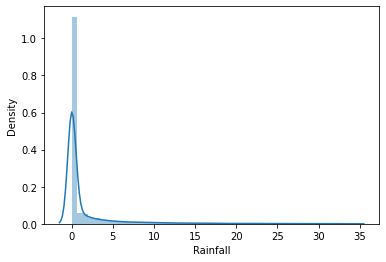

In [243]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

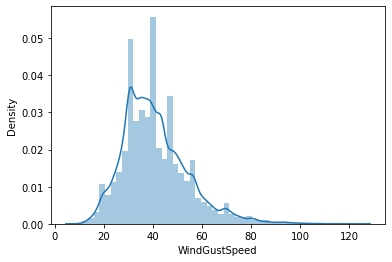

In [244]:
sns.distplot(df['WindGustSpeed'])

In [245]:
q = df['WindGustSpeed'].quantile(0.99)
df = df[df['WindGustSpeed']<q]

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

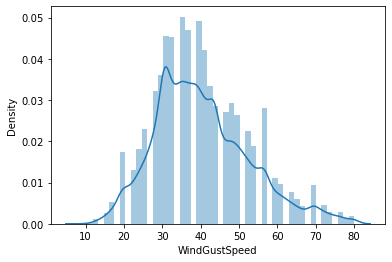

In [246]:
sns.distplot(df['WindGustSpeed'])

------
## Build Model

In [247]:
# Cross Validation 
from sklearn.model_selection import KFold , cross_val_score

cv = KFold(n_splits=5 , random_state=1 , shuffle=True)

In [248]:
lr.score(x_val,y_val)

0.8533582089552239

### Scaling 

In [249]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)

In [250]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
def My_metrics(y_test,y_pred):
    print(f'Accuracy:    {accuracy_score(y_test, y_pred)}\n') 
    print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
    print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
    print(f'Precision:   {recall_score(y_test, y_pred)}\n' )


----
### Logistic Regression 

In [128]:
lr2 =LogisticRegression()
lr2.fit(scaled_x_train,y_train)
lr2.score(scaled_x_train,y_train)

0.8535124413283843

In [129]:
lr2.score(scaled_x_val,y_val)

0.8600746268656716

In [252]:
logit = LogisticRegression(C = 1000) # c=comblictiy , to deal with regularaization.
logit.fit(x_train, y_train)



LogisticRegression(C=1000)

In [251]:
print('The accuracy for training : ',logit.score(x_train,y_train))
print('The accuracy for validation: ',logit.score(x_val,y_val))
print('f1_score for train: ',f1_score(logit.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(logit.predict(x_val), y_val))
print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
print(f'Precision:   {recall_score(y_test, y_pred)}\n' )

The accuracy for training :  0.8505862251811701
The accuracy for validation:  0.8514925373134329
f1_score for train:  0.605925618978556
f1_score for validation:  0.5862785862785862
F1 Score:    0.6403361344537815

Recall:      0.6803571428571429

Precision:   0.6047619047619047



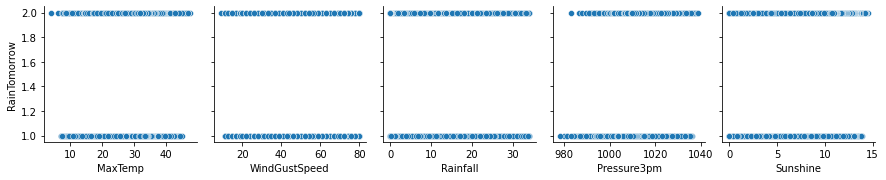

In [168]:
sns.pairplot(x_vars=['MaxTemp','WindGustSpeed','Rainfall','Pressure3pm','Sunshine'],y_vars=['RainTomorrow'],data=df)

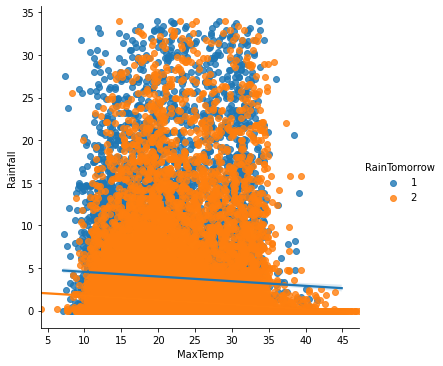

In [175]:
sns.lmplot(x='MaxTemp',y='Rainfall',hue='RainTomorrow',data=df)

In [132]:
print("confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(x_test)))

confusion matrix: 

 [[ 336  294]
 [ 118 2073]]


## knn

In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [253]:
print('The accuracy for training : ',knn.score(x_train,y_train))
print('The accuracy for validation: ',knn.score(x_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(x_val), y_val))
print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
print(f'Precision:   {recall_score(y_test, y_pred)}\n' )

The accuracy for training :  0.9021583298965022
The accuracy for validation:  0.8399253731343284
f1_score for train:  0.7595791911977607
f1_score for validation:  0.5878962536023055
F1 Score:    0.6403361344537815

Recall:      0.6803571428571429

Precision:   0.6047619047619047



In [136]:
knn.fit(x_train,y_train)
scor = cross_val_score(knn,x_train,y_train,cv=cv)
scor.mean()

0.8335198815332209

In [137]:
# KNN With Grid Search 
from sklearn.model_selection import GridSearchCV
import numpy as np 

n_neighbors_rane = np.arange(1,15)
params_grid = dict(n_neighbors=n_neighbors_rane)

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn , param_grid=params_grid , cv=5)
grid.fit(x_train , y_train)


grid.best_params_
grid.best_score_

0.8502719305831331

-----
## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
dicision_model = DecisionTreeClassifier()

dicision_model.fit(x_train,y_train)
scor = cross_val_score(dicision_model,x_train,y_train,cv=cv)
scor.mean()

0.7971876270687888

In [139]:
Decision_Tree = DecisionTreeClassifier(max_depth=8)
Decision_Tree.fit(x_train, y_train)

Accuracy:    0.8500531726338177

F1 Score:    0.6151046405823475

Recall:      0.720682302771855

Precision:   0.5365079365079365



In [180]:
print('The accuracy for training : ',Decision_Tree.score(x_train,y_train))
print('The accuracy for validation: ',Decision_Tree.score(x_val,y_val))
print('f1_score for train: ',f1_score(Decision_Tree.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(Decision_Tree.predict(x_val), y_val))
print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
print(f'Precision:   {recall_score(y_test, y_pred)}\n' )

The accuracy for training :  0.8619965042518509
The accuracy for validation:  0.8451492537313433
f1_score for train:  0.6374284092668077
f1_score for validation:  0.5681581685744017


In [140]:
scores = cross_val_score(Decision_Tree, x,y , cv =5, scoring = 'accuracy')
print(scores.mean())

0.8353952499113788


----
### Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

scor = cross_val_score(naive_model,x_train,y_train,cv=cv)
scor.mean()

0.8024509180349948

In [142]:
Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)


Accuracy:    0.8064516129032258

F1 Score:    0.6213592233009709

Recall:      0.5517241379310345

Precision:   0.7111111111111111



In [184]:
print('The accuracy for training : ',Gaussian.score(x_train,y_train))
print('The accuracy for validation: ',Gaussian.score(x_val,y_val))
print('f1_score for train: ',f1_score(Gaussian.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(Decision_Tree.predict(x_val), y_val))
print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
print(f'Precision:   {recall_score(y_test, y_pred)}\n' )

The accuracy for training :  0.8022938392348632
The accuracy for validation:  0.8093283582089552
f1_score for train:  0.6041134138188682
f1_score for validation:  0.5992156862745098


## Random Forest Model

In [186]:
randomforest = RandomForestClassifier(n_estimators=10)
randomforest.fit(x_train, y_train)

y_pred=randomforest.predict(x_test)
My_metrics(y_test,y_pred)

Accuracy:    0.8482807515065579

F1 Score:    0.6403361344537815

Recall:      0.6803571428571429

Precision:   0.6047619047619047



In [188]:
print('The accuracy for training : ',randomforest.score(x_train,y_train))
print('The accuracy for validation: ',randomforest.score(x_val,y_val))
print('f1_score for train: ',f1_score(randomforest.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(randomforest.predict(x_val), y_val))

The accuracy for training :  0.9935780357037648
The accuracy for validation:  0.8537313432835821
f1_score for train:  0.9854582647752035
f1_score for validation:  0.6252390057361378


In [155]:

randomforest = RandomForestClassifier(n_estimators=10)
scor = cross_val_score(randomforest,x_train,y_train,cv=cv)
scor.mean()

0.8434965099403616

## SVM Model

In [260]:
svc= svm.SVC(kernel='rbf')
svc.fit(scaled_x_train, y_train)
scor = cross_val_score(svc,x_train,y_train,cv=cv)
scor.mean()

0.8408649252072771

In [261]:
print('The accuracy for training : ',svc.score(x_train,y_train))
print('The accuracy for validation: ',svc.score(x_val,y_val))
print('f1_score for train: ',f1_score(svc.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(svc.predict(x_val), y_val))

The accuracy for training :  0.7794536420589564
The accuracy for validation:  0.7884328358208955
f1_score for train:  0.0
f1_score for validation:  0.0


## stacking classifier

In [153]:
model_vars = [svc,randomforest,knn]
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

stacked.fit(x_train , y_train)

StackingClassifier(classifiers=[SVC(), RandomForestClassifier(),
                                KNeighborsClassifier()],
                   meta_classifier=LogisticRegression())

In [154]:
y_pred = stacked.predict(x_val)
accuracy_score(y_val, y_pred)

0.8679104477611941

In [195]:
print('The accuracy for training : ',stacked.score(x_train,y_train))
print('The accuracy for validation: ',stacked.score(x_val,y_val))
print('f1_score for train: ',f1_score(stacked.predict(x_train), y_train))
print('f1_score for validation: ',f1_score(stacked.predict(x_val), y_val))

The accuracy for training :  0.999980360965455
The accuracy for validation:  0.8679104477611941
f1_score for train:  0.9999554783847558
f1_score for validation:  0.6304801670146138


## XGBoost

In [198]:
import xgboost as xgb

xgb = xgb.XGBClassifier(verbosity=0, seed=0, n_estimators=50,
                            gamma= 0.24, max_depth=4, learning_rate=0.13,
                            reg_lambda=50.0, scale_pos_weight=1)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.8589720929319115

In [199]:
print('The accuracy for training : ',xgb.score(x_train,y_train))
print('The accuracy for validation: ',xgb.score(x_val,y_val))
#print('f1_score for train: ',f1_score(xgb.predict(x_train), y_train))
#print('f1_score for validation: ',f1_score(xgb.predict(x_val), y_val))

The accuracy for training :  0.8589720929319115
The accuracy for validation:  0.8582089552238806
